Test VAE model on random frame of random file in `record`

In [1]:
import numpy as np
import os, sys
import json
import tensorflow as tf
import random

import matplotlib.pyplot as plt
np.set_printoptions(precision=4, edgeitems=6, linewidth=100, suppress=True)

from ipywidgets import interact

sys.path.append("..")
from vae import ConvVAE, reset_graph


In [2]:
os.environ["CUDA_VISIBLE_DEVICES"]="-1" # disable GPU

#DATA_DIR = "../../data/ear"
model_path_name = "../models"

z_size=10
sample_n = 8

In [3]:
#obs = np.load(os.path.join(DATA_DIR, random.choice(filelist)))
#obs = np.load(os.path.join(DATA_DIR, "packed_imgs_64.npy"))
obs = np.load("/home/markpp/github/building-datasets-for-successful-machine-learning/data/cell_top.npy")[:]
obs = obs.astype(np.float32)/255

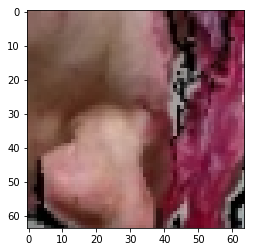

In [4]:
obs.shape
test=obs[sample_n]
test.shape
plt.imshow(test[...,::-1])
plt.show()

In [5]:
!ls

points_notebook.ipynb  vae_notebook.ipynb


In [6]:
vae = ConvVAE(z_size=z_size,
              batch_size=1,
              is_training=False,
              reuse=False,
              gpu_mode=False)

vae.load_json(os.path.join(model_path_name, 'vae__40_29999.json'))

INFO:tensorflow:Model using cpu.
input: Tensor("Placeholder:0", shape=(?, 64, 64, 3), dtype=float32)
(?, 31, 31, 32)
(?, 14, 14, 64)
(?, 6, 6, 128)
(?, 2, 2, 256)
(?, 1024)
z: (?, 10)
(?, 1024)
(?, 1, 1, 1024)
(?, 5, 5, 128)
(?, 13, 13, 64)
(?, 30, 30, 32)
output: Tensor("dec_deconv4/Sigmoid:0", shape=(?, 64, 64, 3), dtype=float32)


In [7]:
def show_rec():
    z = np.array(my_z)
    z = np.expand_dims(z, axis=0)
    reconstruct = vae.decode(z)
    # show reconstruction
    #plt.subplot(1, 2, 1)
    #plt.imshow(obs[sample_n])
    plt.subplot(1, 2, 2)
    plt.imshow(reconstruct[0][...,::-1])
    plt.show()

In [8]:
batch_z = vae.encode(obs)

In [9]:
global my_z
my_z = batch_z[sample_n]
my_z

array([ 0.5979, -0.3846, -0.0809, -0.3871, -1.1579,  0.6644, -0.0704, -0.6268,  0.7544,  0.3542], dtype=float32)

In [10]:
def f(z0=my_z[0],z1=my_z[1],z2=my_z[2],z3=my_z[3],z4=my_z[4],
      z5=my_z[5],z6=my_z[6],z7=my_z[7],z8=my_z[8],z9=my_z[9]):
    my_z[0] = z0
    my_z[1] = z1
    my_z[2] = z2
    my_z[3] = z3
    my_z[4] = z4
    my_z[5] = z5
    my_z[6] = z6
    my_z[7] = z7
    my_z[8] = z8
    my_z[9] = z9
    show_rec()
    

In [11]:
z_min = -3.0
z_max = 3.0
interact(f, z0=(z_min,z_max),z1=(z_min,z_max),z2=(z_min,z_max),
            z3=(z_min,z_max),z4=(z_min,z_max),z5=(z_min,z_max),
            z6=(z_min,z_max),z7=(z_min,z_max),z8=(z_min,z_max),
            z9=(z_min,z_max));

interactive(children=(FloatSlider(value=0.5978999733924866, description='z0', max=3.0, min=-3.0), FloatSlider(…

In [12]:
my_z = batch_z[sample_n]
plt.imshow(reconstruct[0][...,::-1])

NameError: name 'reconstruct' is not defined

IndexError: index 3 is out of bounds for axis 2 with size 3

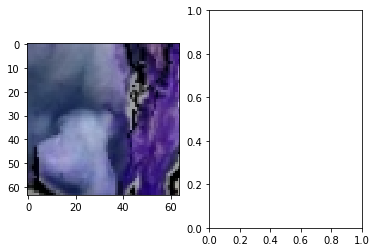

In [11]:
plt.subplot(1, 2, 1)
plt.imshow(obs[sample_n][:,:,:])
plt.subplot(1, 2, 2)
plt.imshow(obs[sample_n][:,:,3], cmap='gray')
plt.show()

In [12]:
obs[sample_n]

array([[[ 0.3686,  0.3922,  0.5255],
        [ 0.3765,  0.4039,  0.5333],
        [ 0.3686,  0.3961,  0.5255],
        [ 0.3765,  0.4039,  0.5333],
        [ 0.4275,  0.451 ,  0.5882],
        [ 0.4196,  0.4431,  0.5804],
        ..., 
        [ 0.1176,  0.0824,  0.2275],
        [ 0.0039,  0.    ,  0.1216],
        [ 0.0471,  0.0275,  0.1961],
        [ 0.1804,  0.102 ,  0.3843],
        [ 0.2549,  0.1451,  0.502 ],
        [ 0.2588,  0.1412,  0.5294]],

       [[ 0.3647,  0.3882,  0.5255],
        [ 0.3647,  0.3922,  0.5255],
        [ 0.3647,  0.3922,  0.5216],
        [ 0.3804,  0.4078,  0.5373],
        [ 0.4039,  0.4275,  0.5647],
        [ 0.4   ,  0.4235,  0.5608],
        ..., 
        [ 0.1647,  0.1294,  0.2588],
        [ 0.    ,  0.    ,  0.1255],
        [ 0.0588,  0.0353,  0.2196],
        [ 0.2039,  0.1216,  0.4196],
        [ 0.2471,  0.1333,  0.4941],
        [ 0.2471,  0.1255,  0.5059]],

       [[ 0.3725,  0.3961,  0.5373],
        [ 0.3647,  0.3922,  0.5255],
      